# Capstone Project — EDA & Feature Engineering (Sections 1–10)
---

## Section 1 — Import Libraries & Load Datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

diabetes = pd.read_csv("/content/diabetic_data.csv")
mimic = pd.read_csv("/content/mimic_iii_data.csv")
ids_map = pd.read_csv("/content/IDS_mapping.csv")

print("=== DATASETS LOADED SUCCESSFULLY ===")

datasets = {
    "Diabetes Dataset": diabetes,
    "MIMIC-III ICU Dataset": mimic,
    "IDS Mapping Table": ids_map
}

for name, df in datasets.items():
    print(f"\n----- Preview: {name} -----")
    print(df.head())

=== DATASETS LOADED SUCCESSFULLY ===

----- Preview: Diabetes Dataset -----
   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-me

## Section 2 — Quick EDA Function

In [3]:
def quick_eda(df, name):
    print(f"\n================ {name} ================\n")
    print("Shape:", df.shape, "\n")
    print("Columns:", df.columns.tolist(), "\n")
    print("Data Types:\n", df.dtypes, "\n")
    print("Missing Values:\n", df.isnull().sum(), "\n")
    print("Head:\n", df.head(), "\n")
    print("Tail:\n", df.tail(), "\n")
    print("Summary Stats:\n", df.describe(include='all'), "\n")

for name, df in datasets.items():
    quick_eda(df, name)


================ Diabetes Dataset ================

Shape: (101766, 50) 

Columns: ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'] 

Data Types:
 encounter_id                 int64
patient_nbr                  int64
race         

## Section 3 — Readmission Focused EDA

In [4]:
print("\n=== READMISSION DISTRIBUTION (DIABETES DATASET) ===\n")
print(diabetes["readmitted"].value_counts())

diabetes["readmit_flag"] = diabetes["readmitted"].apply(lambda x: 1 if x == "<30" else 0)

print("\n=== Binary Readmission Flag Distribution (0/1) ===")
print(diabetes["readmit_flag"].value_counts())


=== READMISSION DISTRIBUTION (DIABETES DATASET) ===

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

=== Binary Readmission Flag Distribution (0/1) ===
readmit_flag
0    90409
1    11357
Name: count, dtype: int64


## Section 4 — Patient ID Mapping

In [5]:
if "patient_id" in diabetes.columns and "patient_id" in mimic.columns:
    common_ids = set(diabetes["patient_id"]).intersection(set(mimic["patient_id"]))
    print("\nCommon Patient IDs found:", len(common_ids))
else:
    print("\n⚠️ Patient ID column missing in one or both datasets.")


⚠️ Patient ID column missing in one or both datasets.


## Section 5 — Missing Value Heatmap

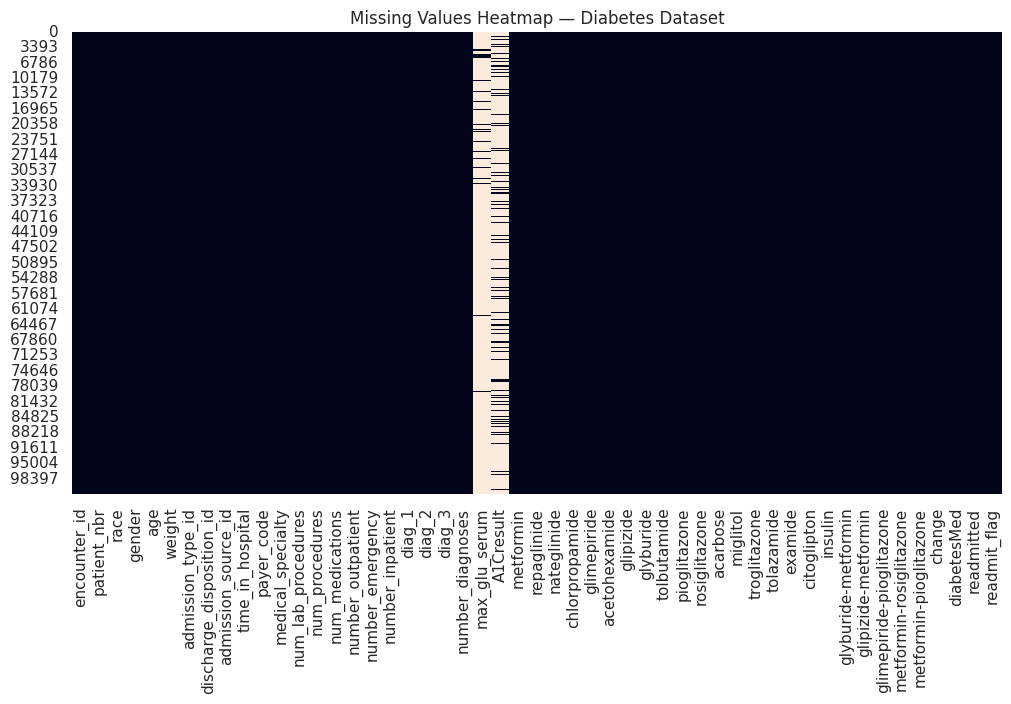

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(diabetes.isnull(), cbar=False)
plt.title("Missing Values Heatmap — Diabetes Dataset")
plt.show()

## Section 6 — Cleaning Diabetes Dataset

In [7]:
diabetes = pd.read_csv("/content/diabetic_data.csv")

cols_to_drop = ['weight', 'max_glu_serum']
diabetes.drop(columns=cols_to_drop, inplace=True)

age_map = {"[0-10)": 5, "[10-20)": 15, "[20-30)": 25, "[30-40)": 35,
    "[40-50)": 45, "[50-60)": 55, "[60-70)": 65,
    "[70-80)": 75, "[80-90)": 85, "[90-100)": 95}
diabetes["age_num"] = diabetes["age"].map(age_map)

diabetes.replace("?", np.nan, inplace=True)

diabetes["A1C_binary"] = diabetes["A1Cresult"].apply(lambda x: 1 if x in [">7", ">8"] else 0)

diabetes["readmit_flag"] = diabetes["readmitted"].apply(lambda x: 1 if x == "<30" else 0)

diabetes.rename(columns={"patient_nbr": "Patient_ID"}, inplace=True)

print("Clean Diabetes Dataset Shape:", diabetes.shape)
diabetes.head()

Clean Diabetes Dataset Shape: (101766, 51)


encounter_id  Patient_ID             race  gender      age  \
0       2278392     8222157        Caucasian  Female   [0-10)   
1        149190    55629189        Caucasian  Female  [10-20)   
2         64410    86047875  AfricanAmerican  Female  [20-30)   
3        500364    82442376        Caucasian    Male  [30-40)   
4         16680    42519267        Caucasian    Male  [40-50)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code  ... glipizide-metformin  \
0                 1        NaN  ...                  No   
1                 3        NaN  ...                  No   
2                 2        NaN  ...                  No   
3                 2        NaN  ...                  No   
4                 1        NaN  ...                  No   

   glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  \
0                        No                       No                      No   
1                        No                       No                      No   
2                        No                       No                      No   
3                        No                       No                      No   
4                        No                       No                      No   

   change  diabetesMed  readmitted age_num A1C_binary readmit_flag  
0      No           No          NO       5          0            0  
1      Ch          Yes         >30      15          0            0  
2      No          Yes          NO      25          0            0  
3      Ch          Yes          NO      35          0            0  
4      Ch          Yes          NO      45          0            0  

[5 rows x 51 columns]

## Section 7 — Visual EDA on Diabetes Dataset

/tmp/ipython-input-1073324875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=diabetes, x="readmitted", palette="viridis")


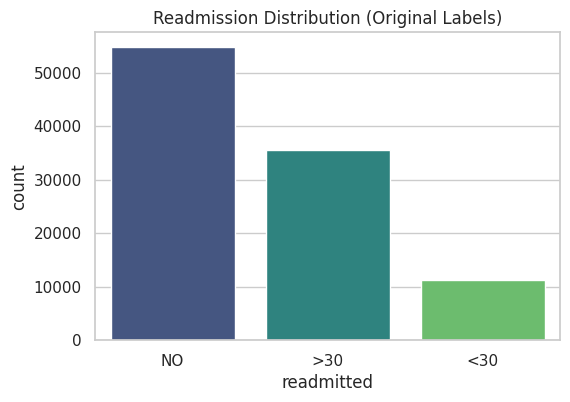

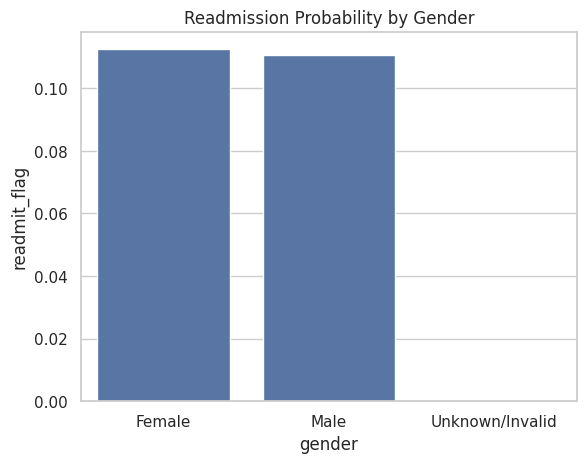

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=diabetes, x="readmitted", palette="viridis")
plt.title("Readmission Distribution (Original Labels)")
plt.show()

gender_rate = diabetes.groupby("gender")["readmit_flag"].mean().reset_index()
sns.barplot(data=gender_rate, x="gender", y="readmit_flag")
plt.title("Readmission Probability by Gender")
plt.show()

## Section 8 — Cleaning & EDA for MIMIC Dataset

/tmp/ipython-input-3848301058.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mimic["Medications"].fillna("Unknown", inplace=True)


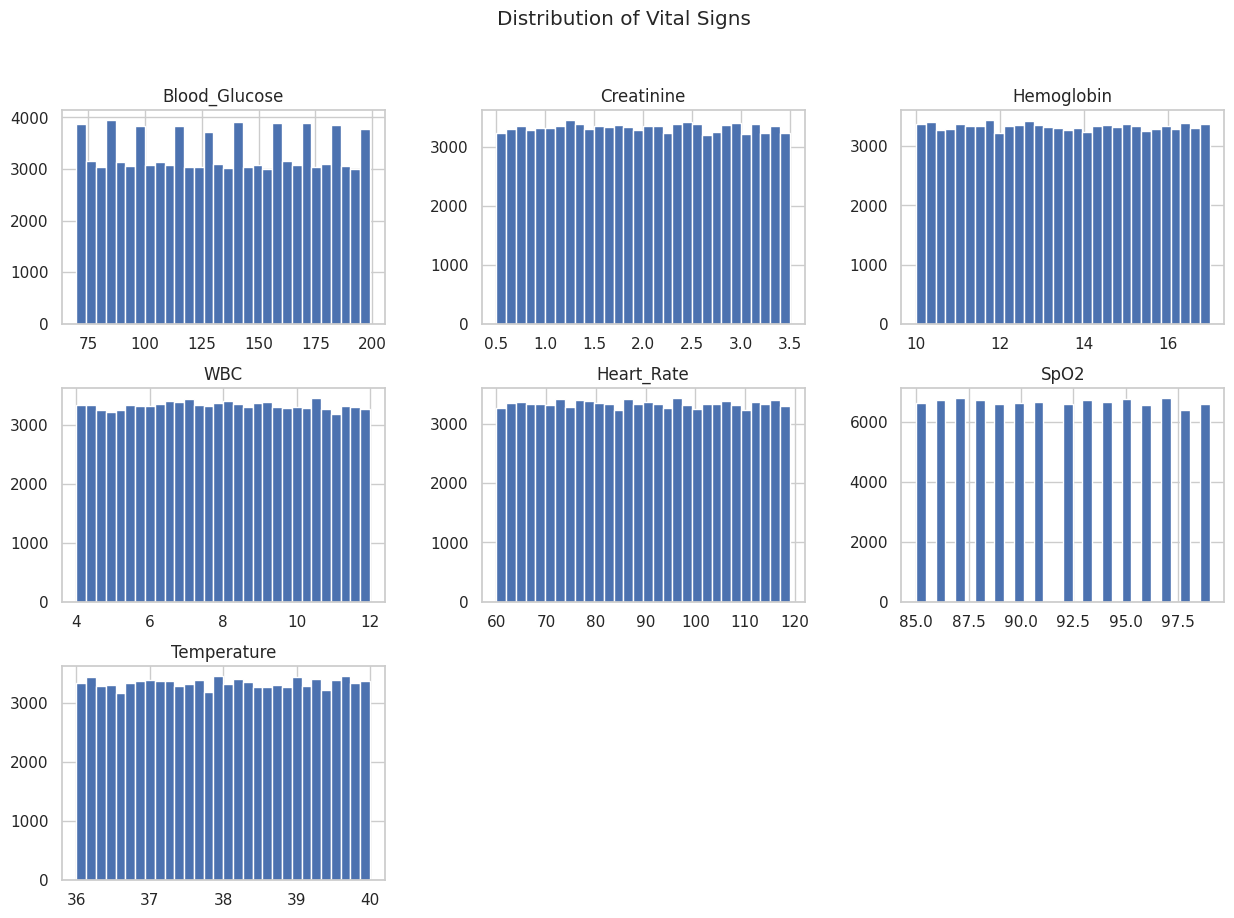

In [9]:
mimic = pd.read_csv("/content/mimic_iii_data.csv")
mimic["Medications"].fillna("Unknown", inplace=True)
mimic.rename(columns={"Readmission_Flag": "readmit_flag"}, inplace=True)

vital_cols = ["Blood_Glucose","Creatinine","Hemoglobin","WBC","Heart_Rate","SpO2","Temperature"]
mimic[vital_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Distribution of Vital Signs")
plt.show()

## Section 9 — Merge Diabetes + MIMIC ICU Data

In [10]:
merged_df = diabetes.merge(mimic, on="Patient_ID", how="inner")
print("Merged Dataset Shape:", merged_df.shape)
merged_df.head()

Merged Dataset Shape: (141325, 68)


encounter_id  Patient_ID             race  gender      age  \
0       2278392     8222157        Caucasian  Female   [0-10)   
1       2278392     8222157        Caucasian  Female   [0-10)   
2        149190    55629189        Caucasian  Female  [10-20)   
3        149190    55629189        Caucasian  Female  [10-20)   
4         64410    86047875  AfricanAmerican  Female  [20-30)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  6                        25                    1   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code  ... Heart_Rate  Blood_Pressure_Systolic  \
0                 1        NaN  ...        110                      116   
1                 1        NaN  ...         85                      160   
2                 3        NaN  ...         74                      148   
3                 3        NaN  ...         61                      128   
4                 2        NaN  ...         96                      171   

   Blood_Pressure_Diastolic  SpO2  Respiratory_Rate  Temperature  Medications  \
0                        68    97                16    36.509798      Unknown   
1                        61    92                15    39.599822      Unknown   
2                        63    95                16    37.639906     Steroids   
3                        75    87                21    39.013647      Insulin   
4                        72    87                17    37.377471      Insulin   

  Number_of_Lab_Tests Number_of_Medications readmit_flag_y  
0                   9                     1              0  
1                  17                     3              1  
2                   6                     2              0  
3                  19                     3              0  
4                   7                     4              0  

[5 rows x 68 columns]

## Section 10 — Feature Engineering

In [13]:
icu_agg = mimic.groupby("Patient_ID").agg({
    "ICU_Length_of_Stay": "sum",
    "Blood_Glucose": "mean",
    "Creatinine": "max",
    "Hemoglobin": "mean",
    "WBC": "mean",
    "Heart_Rate": "mean",
    "Blood_Pressure_Systolic": "mean",
    "Blood_Pressure_Diastolic": "mean",
    "SpO2": "min",
    "Respiratory_Rate": "mean",
    "Temperature": "mean",
    "Number_of_Lab_Tests": "sum",
    "Number_of_Medications": "sum",
    "readmit_flag": "max"
}).reset_index()

icu_agg.rename(columns={"readmit_flag": "icu_readmission"}, inplace=True)

final_df = diabetes.merge(icu_agg, on="Patient_ID", how="left")

final_df["readmission_diabetes"] = final_df["readmitted"].apply(lambda x: 1 if x == "<30" else 0)
final_df["no_icu_history"] = final_df["ICU_Length_of_Stay"].isna().astype(int)

final_df["total_visits"] = (
    final_df["number_outpatient"] +
    final_df["number_emergency"] +
    final_df["number_inpatient"]
)
final_df["high_utilizer"] = (final_df["total_visits"] >= 3).astype(int)
final_df["shock_index"] = final_df["Heart_Rate"] / final_df["Blood_Pressure_Systolic"]
final_df["low_spo2_flag"] = (final_df["SpO2"] < 92).astype(int)
final_df["renal_risk_flag"] = (final_df["Creatinine"] > 1.3).astype(int)

print("Final ML Dataset Shape:", final_df.shape)
print(final_df.head(4))
#----------------------------------------------------
# Sving final cleaned merged data (final_df) into csv
#-----------------------------------------------------

final_df.to_csv("final_df.csv", index=False)

print("Successfully saved into CSV!")

Final ML Dataset Shape: (101766, 72)
   encounter_id  Patient_ID             race  gender      age  \
0       2278392     8222157        Caucasian  Female   [0-10)   
1        149190    55629189        Caucasian  Female  [10-20)   
2         64410    86047875  AfricanAmerican  Female  [20-30)   
3        500364    82442376        Caucasian    Male  [30-40)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   

   time_in_hospital payer_code  ... Number_of_Lab_Tests  \
0                 1        NaN  ...                  26   
1                 3        NaN  ...                  25   
2                 2        NaN  ...                  13   
3                 2        NaN  ...          

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# # =========================
# # 1. Loading ML ready data
# # =========================

df=final_df.copy()

# =========================
# 2. Define target & drop leakage
# =========================
TARGET = "readmission_diabetes"

leak_or_id_cols = [
    "encounter_id",
    "Patient_ID",
    "readmission_diabetes",  # target
    "readmitted",            # original multi-class label
    "readmit_flag",          # exact duplicate of target → MUST drop
]

# Keep only columns that are not ID/target/leakage
X = df.drop(columns=[c for c in leak_or_id_cols if c in df.columns])
y = df[TARGET]

# =========================
# 3. Train-test split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,   # preserve class proportions
)

# =========================
# 4. Preprocessing
# =========================
numeric_features = X.select_dtypes(exclude=["object"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# =========================
# 5. Define models
# =========================
models = {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,
        class_weight="balanced",   # handle imbalance
        n_jobs=-1
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    ),
    "Gradient Boosting": GradientBoostingClassifier(
        random_state=42
    ),
}

# OPTIONAL: XGBoost if installed
try:
    from xgboost import XGBClassifier
    models["XGBoost"] = XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        tree_method="hist"  # fast
    )
except ImportError:
    print("XGBoost not installed – skipping.")

# =========================
# 6. Train & evaluate
# =========================
results = []

for name, model in models.items():
    clf = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    # Some models (e.g., SVC) might not have predict_proba, but ours do.
    if hasattr(clf.named_steps["model"], "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.decision_function(X_test)

    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
        "ROC_AUC": roc_auc_score(y_test, y_proba),
    }
    results.append(metrics)

results_df = pd.DataFrame(results).sort_values(by="ROC_AUC", ascending=False)
print("Baseline majority-class accuracy (always predict 0):",
      df[TARGET].value_counts().max() / len(df))

Baseline majority-class accuracy (always predict 0): 0.8884008411453728

Model comparison:
              Model  Accuracy  Precision   Recall       F1  ROC_AUC
            XGBoost  0.888621   0.547619 0.010128 0.019888 0.685608
  Gradient Boosting  0.888671   0.567568 0.009247 0.018198 0.676165
      Random Forest  0.888769   0.577778 0.011449 0.022453 0.656803
Logistic Regression  0.643706   0.167268 0.551299 0.256663 0.643474


In [16]:
from sklearn.metrics import confusion_matrix, classification_report

best_model_name = results_df.iloc[0]["Model"]
print("\nBest model by ROC_AUC:", best_model_name)

best_clf = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", models[best_model_name])
])
best_clf.fit(X_train, y_train)
y_pred_best = best_clf.predict(X_test)

print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification report:\n", classification_report(y_test, y_pred_best))


Best model by ROC_AUC: XGBoost

Confusion matrix:
 [[18064    19]
 [ 2248    23]]

Classification report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18083
           1       0.55      0.01      0.02      2271

    accuracy                           0.89     20354
   macro avg       0.72      0.50      0.48     20354
weighted avg       0.85      0.89      0.84     20354



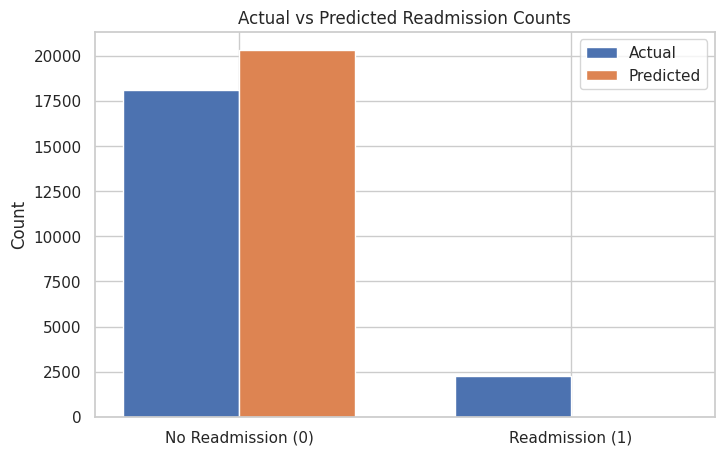

In [18]:
import numpy as np

plt.figure(figsize=(8,5))

# Count actual and predicted values
actual_counts = y_test.value_counts().sort_index()
pred_counts = pd.Series(y_pred_best).value_counts().sort_index()

x = np.arange(2)  # 0 and 1
width = 0.35

plt.bar(x - width/2, actual_counts, width=width, label='Actual', color='#4c72b0')
plt.bar(x + width/2, pred_counts, width=width, label='Predicted', color='#dd8452')

plt.xticks(x, ['No Readmission (0)', 'Readmission (1)'])
plt.ylabel("Count")
plt.title("Actual vs Predicted Readmission Counts")
plt.legend()
plt.show()


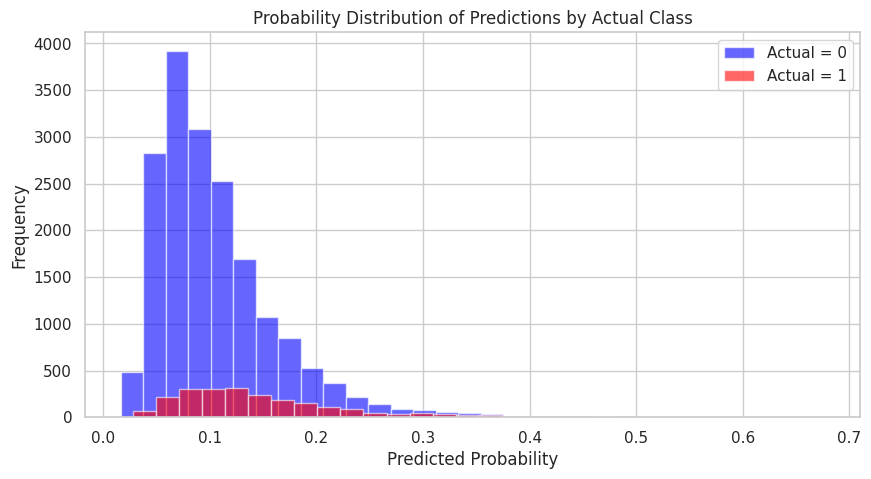

In [19]:
plt.figure(figsize=(10,5))

plt.hist(y_prob_best[y_test == 0], bins=30, alpha=0.6, label="Actual = 0", color="blue")
plt.hist(y_prob_best[y_test == 1], bins=30, alpha=0.6, label="Actual = 1", color="red")

plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Probability Distribution of Predictions by Actual Class")
plt.legend()
plt.show()


/tmp/ipython-input-1405001947.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_prob_best[y_test == 0], shade=True, label="Actual = 0 (Not Readmitted)", color="blue")
/tmp/ipython-input-1405001947.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_prob_best[y_test == 1], shade=True, label="Actual = 1 (Readmitted)", color="red")


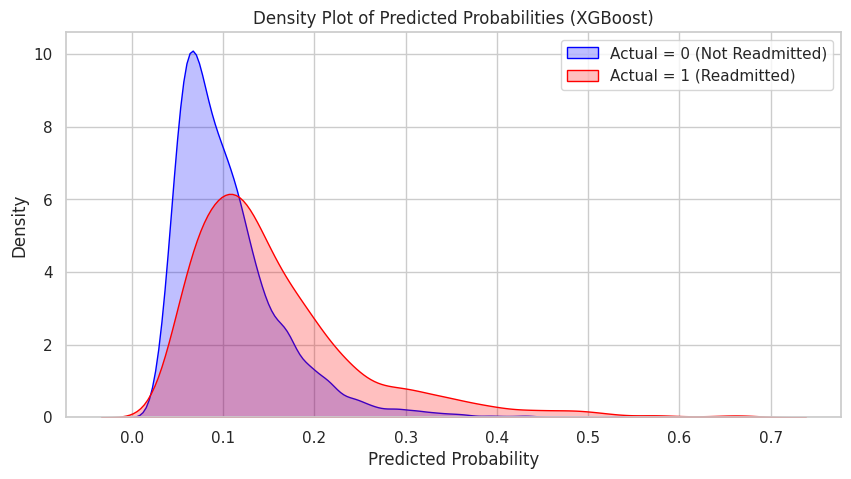

In [20]:
plt.figure(figsize=(10,5))

sns.kdeplot(y_prob_best[y_test == 0], shade=True, label="Actual = 0 (Not Readmitted)", color="blue")
sns.kdeplot(y_prob_best[y_test == 1], shade=True, label="Actual = 1 (Readmitted)", color="red")

plt.xlabel("Predicted Probability")
plt.ylabel("Density")
plt.title("Density Plot of Predicted Probabilities (XGBoost)")
plt.legend()
plt.show()


In [21]:
# Extract the trained XGBoost model
xgb_model = best_clf.named_steps["model"]

# Get feature names AFTER preprocessing (very important)
feature_names = best_clf.named_steps["preprocess"].get_feature_names_out()

# Get feature importance values
importances = xgb_model.feature_importances_

# Create importance dataframe
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Show Top 15 most important features
importance_df.head(15)

Feature  Importance
9             num__number_inpatient    0.028120
28                num__total_visits    0.009667
1     num__discharge_disposition_id    0.008777
824                 cat__diag_1_V57    0.008773
1191                cat__diag_2_571    0.005407
911              cat__diag_2_250.13    0.004933
825                 cat__diag_1_V58    0.004925
1747                cat__diag_3_357    0.004854
412                 cat__diag_1_434    0.004730
338                 cat__diag_1_348    0.004454
50                cat__age_[90-100)    0.004307
524                 cat__diag_1_575    0.004300
1732                cat__diag_3_342    0.004183
255               cat__diag_1_250.6    0.004065
2379           cat__diabetesMed_Yes    0.004057

from matplotlib import pyplot as plt
_df_0['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)